In [1]:

import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from datetime import datetime

In [15]:
# Load the dataset
df = pd.read_csv('climate_action_data.csv')

In [33]:
# initial inspection
print("\nFirst 10 rows:")
print(df.head(10))


First 10 rows:
  Sensor_ID        Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  \
0  SEN-1000  2025-01-01             36.22     6.98            21.3   
1  SEN-1001  2025-01-02             76.55     5.03            23.5   
2  SEN-1002  2025-01-03             61.24     6.52            21.9   
3  SEN-1003  2025-01-04             51.91     6.62            24.0   
4  SEN-1004  2025-01-05             20.92     5.98            19.2   
5  SEN-1005  2025-01-06             20.92     7.08            26.8   
6  SEN-1006  2025-01-07             14.07     7.77            19.1   
7  SEN-1007  2025-01-08             70.63     7.74            31.6   
8  SEN-1008  2025-01-09             52.08     6.08            22.0   
9  SEN-1009  2025-01-10             59.57     4.90            27.2   

   Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha)  \
0         50.4  Tomatoes                           67.6   
1         34.3     Wheat                          130.4   
2         54.6  Tomatoes            

In [18]:
# Data inspection
print("Initial dataset info:")
print(df.info())

Initial dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB
None


In [19]:
# Data inspection
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [20]:
#Data inspection
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 111


In [21]:
# Data cleaning steps
# 1. Replace 'error' values with NaN
df.replace('error', np.nan, inplace=True)

In [22]:
# 2. Convert numeric columns to appropriate types
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [23]:
# 3. Handle missing values
# For numeric columns, fill with median (less sensitive to outliers)
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\oba phillip\AppData\Local\Temp\ipykernel_16232\233332265.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\oba phillip\AppData\Local\Temp\ipykernel_16232\233332265.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [24]:
# For categorical columns, fill with mode
df['Crop_Type'].fillna(df['Crop_Type'].mode()[0], inplace=True)

C:\Users\oba phillip\AppData\Local\Temp\ipykernel_16232\2290429010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Crop_Type'].fillna(df['Crop_Type'].mode()[0], inplace=True)


In [25]:
# 4. Remove duplicate records
df.drop_duplicates(inplace=True)

In [26]:
# 5. Check for any remaining missing values
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [27]:
# Export cleaned data
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)

In [28]:
# Descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
       Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        802.000000  802.000000      802.000000   802.000000   
mean          44.766353    6.249084       26.461471    60.033292   
std           20.460694    1.021579        4.863302    17.416061   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.947500    5.330000       22.300000    46.025000   
50%           45.230000    6.285000       26.600000    59.500000   
75%           62.555000    7.080000       30.600000    75.275000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     802.000000                  802.000000  
mean                       87.460723                   17.392269  
std                        34.765497                    7.140127  
min                        30.000000                    5.000000  
25%                        

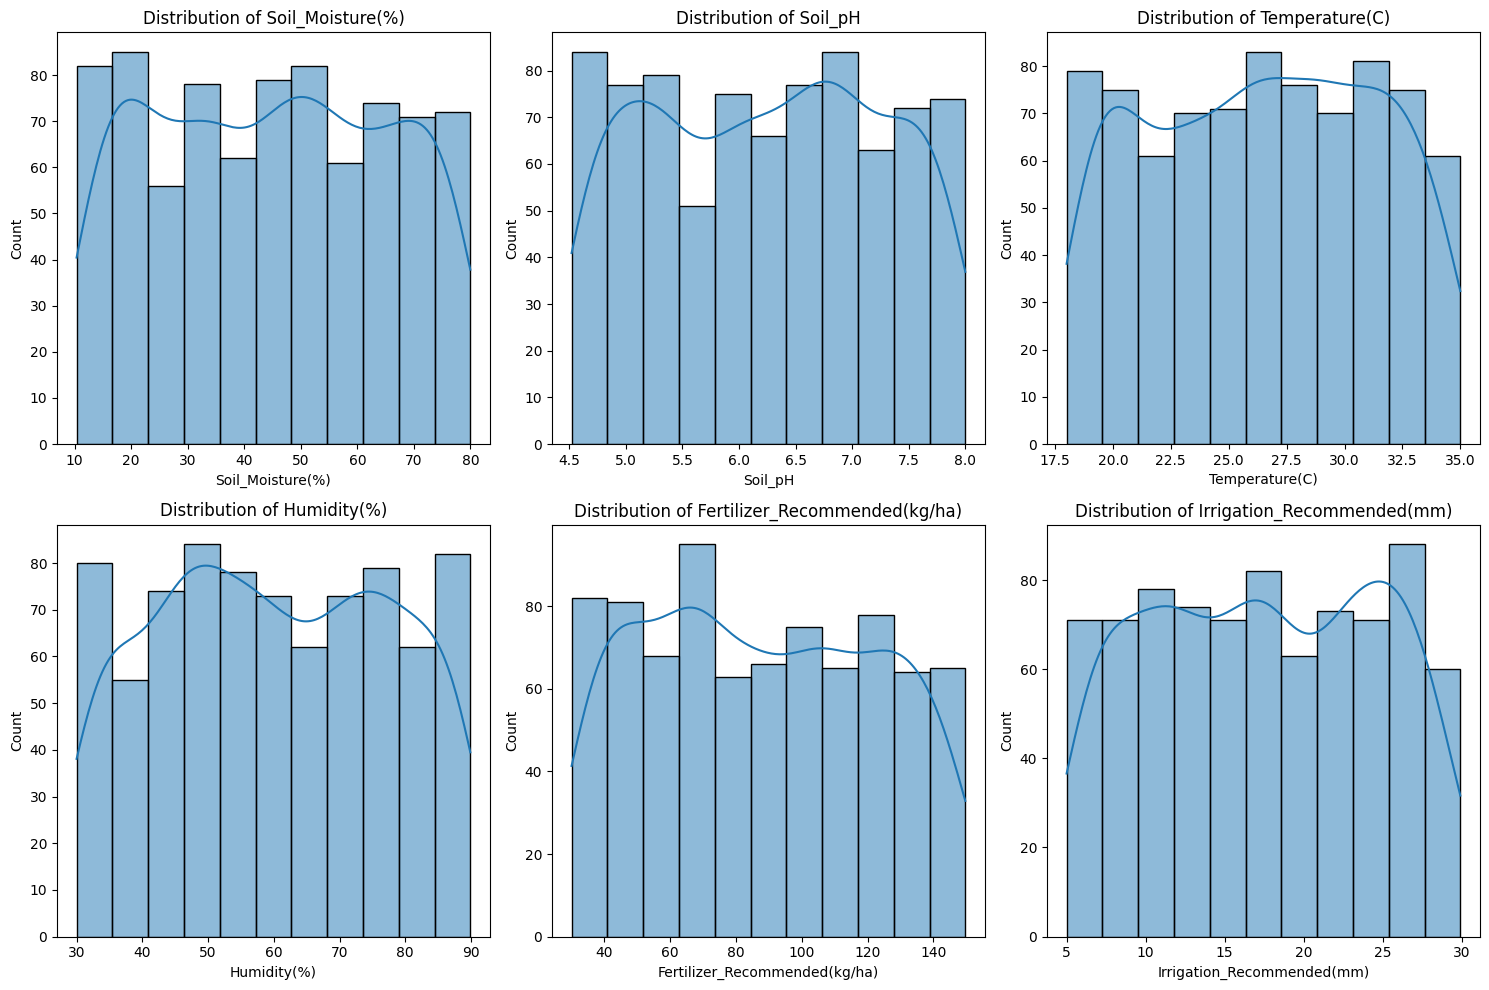

In [29]:
# Visualizations
# 1. Distribution of numeric variables
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

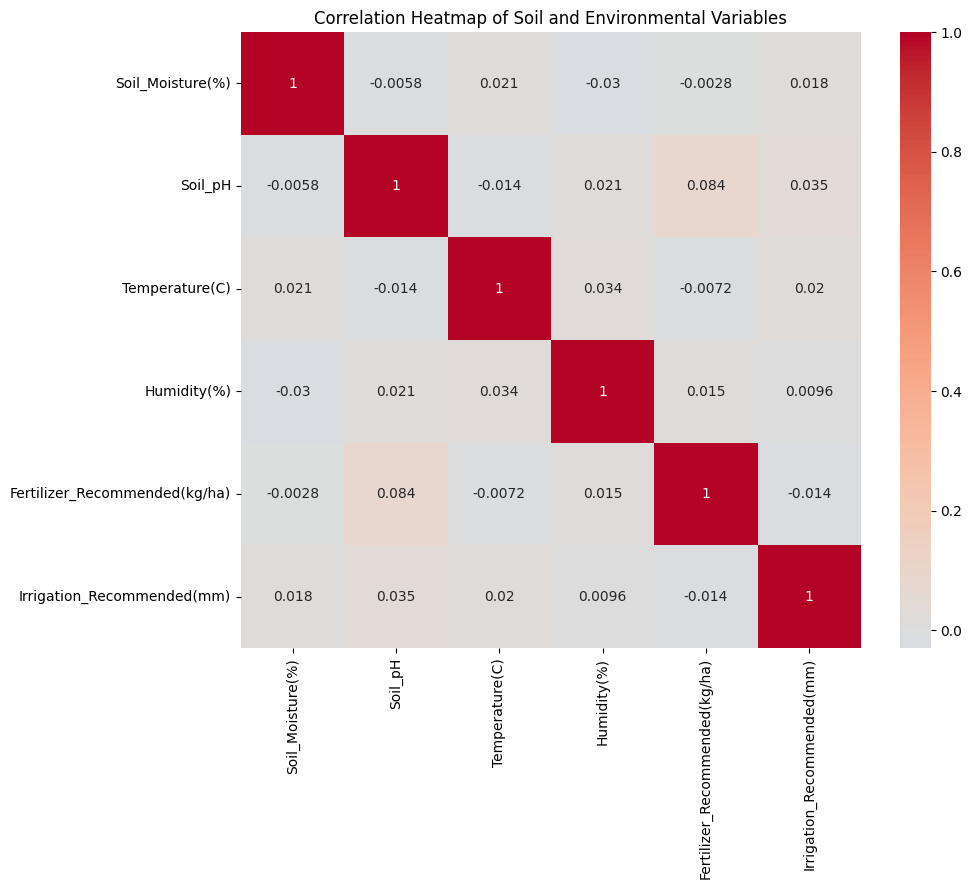

In [30]:
# 2. Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Soil and Environmental Variables')
plt.show()


Average soil moisture by crop type:
Crop_Type
Wheat       47.356449
Maize       44.953581
Beans       44.394375
Tomatoes    43.817946
Lettuce     42.984868
Name: Soil_Moisture(%), dtype: float64


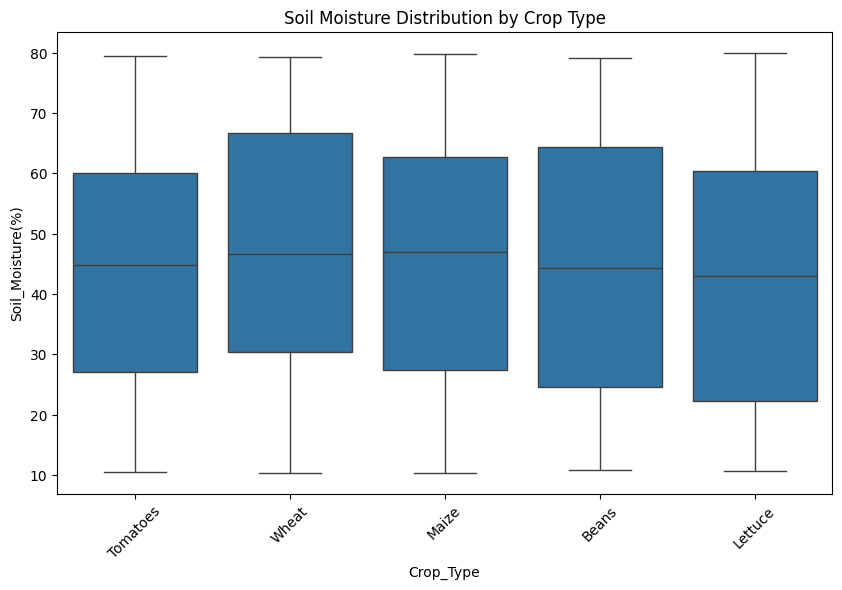

In [31]:
# 3. Crop analysis
# Which crop has the highest average soil moisture?
crop_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print("\nAverage soil moisture by crop type:")
print(crop_moisture)

# Visualize crop differences
plt.figure(figsize=(10, 6))
sns.boxplot(x='Crop_Type', y='Soil_Moisture(%)', data=df)
plt.title('Soil Moisture Distribution by Crop Type')
plt.xticks(rotation=45)
plt.show()

In [32]:
# 4. Temperature analysis for irrigation recommendations
high_temp_crops = df[df['Temperature(C)'] > 30]
print("\nRecords with temperature above 30°C:")
print(high_temp_crops.shape[0])

# Average irrigation for high temp crops vs others
print("\nAverage irrigation recommendation:")
print("All crops:", df['Irrigation_Recommended(mm)'].mean())
print("Crops with temp >30°C:", high_temp_crops['Irrigation_Recommended(mm)'].mean())


Records with temperature above 30°C:
227

Average irrigation recommendation:
All crops: 17.39226932668329
Crops with temp >30°C: 17.64845814977974
